# Weeks 7 Exercises

Name: Kesav Adithya Venkidusamy <br>
Course: DSC550 - Data Mining <br>
Instructor: Brett Werner <br>

## Dimensionality Reduction and Feature Selection

### Part 1: PCA and Variance Threshold in a Linear Regression

##### 1. Import the housing data as a data frame and ensure that the data is loaded properly.

In [1]:
## Importing the libraries required for this assignment
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [3]:
## Display all the columns and rows so they can all be seen
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
## Import the csv file having movie review data into dataframe
house_df = pd.read_csv('train.csv') 
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
## Display the rows and columns of the dataframe
house_df.shape

(1460, 81)

##### 2. Drop the "Id" column and any features that are missing more than 40% of their values.

In [10]:
# Determine the columns which are missing 40% of their values
percent_missing = house_df.isnull().sum() * 100 / len(house_df)
missing_value_df = pd.DataFrame({'column_name': house_df.columns,
                                 'percent_missing': percent_missing})

In [11]:
## Displaying the missing_value_df dataframe
missing_value_df.sort_values(by=['percent_missing'], ascending=False)

,column_name,percent_missing
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
FireplaceQu,FireplaceQu,47.260274
LotFrontage,LotFrontage,17.739726
GarageYrBlt,GarageYrBlt,5.547945
GarageCond,GarageCond,5.547945
GarageType,GarageType,5.547945
GarageFinish,GarageFinish,5.547945


In [13]:
# Dropping the id column
# Droppin the features with more than 40% of values missing: PoolQC, MiscFeature, Alley, Fence, FireplaceQu  
house_df = house_df.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'] , axis=1)
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [16]:
## Displaying the number of rows and columns present in the dataframe
print("Number of rows and columns present in the dataframe: {}".format(house_df.shape))

Number of rows and columns present in the dataframe: (1460, 75)


In [17]:
## Displaying the datatype for each of the columns
house_df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object


##### 3. For numerical columns, fill in any missing data with the median value

In [19]:
## Find numerical fields present in the dataframe
numCols = house_df.select_dtypes("number").columns
numCols= list(numCols)

In [20]:
## Displaying the numerical fields
numCols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [21]:
## Calculate median value for all numerical columns
house_df.median()

MSSubClass           50.0
LotFrontage          69.0
LotArea            9478.5
OverallQual           6.0
OverallCond           5.0
YearBuilt          1973.0
YearRemodAdd       1994.0
MasVnrArea            0.0
BsmtFinSF1          383.5
BsmtFinSF2            0.0
BsmtUnfSF           477.5
TotalBsmtSF         991.5
1stFlrSF           1087.0
2ndFlrSF              0.0
LowQualFinSF          0.0
GrLivArea          1464.0
BsmtFullBath          0.0
BsmtHalfBath          0.0
FullBath              2.0
HalfBath              0.0
BedroomAbvGr          3.0
KitchenAbvGr          1.0
TotRmsAbvGrd          6.0
Fireplaces            1.0
GarageYrBlt        1980.0
GarageCars            2.0
GarageArea          480.0
WoodDeckSF            0.0
OpenPorchSF          25.0
EnclosedPorch         0.0
3SsnPorch             0.0
ScreenPorch           0.0
PoolArea              0.0
MiscVal               0.0
MoSold                6.0
YrSold             2008.0
SalePrice        163000.0
dtype: float64

In [22]:
# Fill the missing values with the median from the numeric columns
house_df = house_df.fillna(house_df.median())
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [24]:
## Calculating the shape of the dataframe
print("Number of rows and columns present in the dataframe: {}".format(house_df.shape))

Number of rows and columns present in the dataframe: (1460, 75)


In [29]:
## Check if any mising data is present in the numerical fields
house_df[numCols].isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

###### 4. For categorical columns, fill in any missing data with the most common value (mode).

In [30]:
# Find the categorical columns in the dataframe
catCols = house_df.select_dtypes("object").columns
catCols= list(set(catCols))

In [31]:
## Displaying the categorical fields
catCols

['CentralAir',
 'GarageType',
 'BldgType',
 'BsmtQual',
 'Functional',
 'GarageQual',
 'LotConfig',
 'RoofMatl',
 'Utilities',
 'Heating',
 'Condition1',
 'Neighborhood',
 'Condition2',
 'Street',
 'GarageCond',
 'LandContour',
 'Foundation',
 'SaleType',
 'BsmtExposure',
 'BsmtFinType2',
 'MasVnrType',
 'Exterior1st',
 'LandSlope',
 'Electrical',
 'BsmtCond',
 'Exterior2nd',
 'HouseStyle',
 'MSZoning',
 'HeatingQC',
 'GarageFinish',
 'PavedDrive',
 'SaleCondition',
 'BsmtFinType1',
 'KitchenQual',
 'ExterQual',
 'LotShape',
 'ExterCond',
 'RoofStyle']

In [32]:
## Calculating the mode for each of the columns
mode = house_df.mode()
mode

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,69.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,2006,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,0,0,GasA,Ex,Y,SBrkr,864,0,0,864,0,0,2,0,3,1,TA,6,Typ,0,Attchd,1980.0,Unf,2,0,TA,TA,Y,0,0,0,0,0,0,0,6,2009,WD,Normal,140000


In [33]:
## Populating the mode value for missing categorical data using for loop
for col in catCols:
    house_df[col] = house_df[col].fillna(house_df[col].mode()[0])

In [35]:
# Checking shape of dataframe
print("Number of rows and columns present in the dataframe: {}".format(house_df.shape))

Number of rows and columns present in the dataframe: (1460, 75)


In [36]:
## Checking if any missing values is present in the categorical fields
house_df[catCols].isna().sum()

CentralAir       0
GarageType       0
BldgType         0
BsmtQual         0
Functional       0
GarageQual       0
LotConfig        0
RoofMatl         0
Utilities        0
Heating          0
Condition1       0
Neighborhood     0
Condition2       0
Street           0
GarageCond       0
LandContour      0
Foundation       0
SaleType         0
BsmtExposure     0
BsmtFinType2     0
MasVnrType       0
Exterior1st      0
LandSlope        0
Electrical       0
BsmtCond         0
Exterior2nd      0
HouseStyle       0
MSZoning         0
HeatingQC        0
GarageFinish     0
PavedDrive       0
SaleCondition    0
BsmtFinType1     0
KitchenQual      0
ExterQual        0
LotShape         0
ExterCond        0
RoofStyle        0
dtype: int64

In [37]:
##Displaying few records from dataframe
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


##### 5. Convert the categorical columns to dummy variables

In [38]:
## Creating dummy variables for all categorical columns using get_dummies method available in pandas
house_dummy_df = pd.get_dummies(house_df, columns=catCols)

In [39]:
## Displaying sample records from dataframe
house_dummy_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,CentralAir_N,CentralAir_Y,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Utilities_AllPub,Utilities_NoSeWa,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Street_Grvl,Street_Pave,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd

In [42]:
##Printing number of rows and columns in the dataframe
print("Number of rows and columns present in dataframe: {}".format(house_dummy_df.shape))

Number of rows and columns present in dataframe: (1460, 271)


In [44]:
## Prinint all the columns present in the dataframe
for col in house_dummy_df.columns:
    print(col)

MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice
CentralAir_N
CentralAir_Y
GarageType_2Types
GarageType_Attchd
GarageType_Basment
GarageType_BuiltIn
GarageType_CarPort
GarageType_Detchd
BldgType_1Fam
BldgType_2fmCon
BldgType_Duplex
BldgType_Twnhs
BldgType_TwnhsE
BsmtQual_Ex
BsmtQual_Fa
BsmtQual_Gd
BsmtQual_TA
Functional_Maj1
Functional_Maj2
Functional_Min1
Functional_Min2
Functional_Mod
Functional_Sev
Functional_Typ
GarageQual_Ex
GarageQual_Fa
GarageQual_Gd
GarageQual_Po
GarageQual_TA
LotConfig_Corner
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
RoofMatl_ClyTile
RoofMatl_CompShg
RoofMatl_Membran
RoofMatl_Metal
RoofMatl_Ro

##### 6. Split the data into a training and test set, where the SalePrice column is the target.

In [45]:
#split the data into a training and test set
X = house_dummy_df.drop(['SalePrice'], axis = 1)

#get the target
y = house_dummy_df['SalePrice']

#split the data into training and test sets (80% Training/20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#reset indices in the training and test sets to prevent pandas slicing warnings
X_train = X_train.reset_index(drop = True) 
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [47]:
#Disply the sizes of the training and test sets
print("The number of rows and columns present in training set: {}".format(X_train.shape))
print("The number of rows and columns present in test set: {}".format(X_test.shape))

#Check how many values are present for each sale price for traning and test set
print(y_train.value_counts())
print(y_test.value_counts())

The number of rows and columns present in training set: (1168, 270)
The number of rows and columns present in test set: (292, 270)
140000    16
135000    13
110000    13
155000    13
190000    12
130000    11
145000    11
160000    11
115000     9
139000     9
144000     9
129000     8
127000     8
125000     8
147000     8
143000     8
170000     8
185000     8
180000     7
230000     7
215000     7
100000     7
175000     7
141000     6
250000     6
235000     6
165000     6
133000     6
181000     6
260000     6
176000     6
119000     6
120000     6
200000     6
187500     6
173000     6
290000     5
105000     5
275000     5
128000     5
189000     5
137500     5
207500     5
112000     5
124000     5
178000     5
113000     5
157000     5
152000     5
220000     5
177000     5
132500     5
132000     5
158000     5
171000     5
108000     5
240000     4
117000     4
239000     4
225000     4
167000     4
148000     4
118500     4
179900     4
210000     4
172500     4
156000     

In [48]:
# Check if missing data is present in training and test dataset
print(X_train.isna().sum())
print(X_test.isna().sum())

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
MiscVal                  0
MoSold                   0
YrSold                   0
CentralAir_N             0
C

##### 7. Run a linear regression and report the R2-value and RMSE on the test set.

In [49]:
## import LinearRegression library from sklearn
from sklearn.linear_model import LinearRegression

## Create Regression Model
model = LinearRegression()

## Train the model
model.fit(X_train, y_train)

## Use model to make predictions on test set
y_pred = model.predict(X_test)

In [50]:
## Import libraries to calculate RMSE and R2
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

print("Root Mean Squared Error (RMSE):", sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of Determination (R2):", r2_score(y_test, y_pred))

Root Mean Squared Error (RMSE): 38466.14336838382
Coefficient of Determination (R2): 0.8125459924339239


###### 8. Fit and transform the training features with a PCA so that 90% of the variance is retained (see section 9.1 in the Machine Learning with Python Cookbook).

In [51]:
## Import libraries for PCA and StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [52]:
## Declare StandardScaler
sc = StandardScaler()

In [53]:
## Standardize the feature matrix
features_Xtrain=sc.fit_transform(X_train)

In [54]:
## Create a PCA that will retain 90% of the variance
pca=PCA(n_components=0.9, whiten=True)

In [63]:
## Conduct PCA
features_pca=pca.fit_transform(features_Xtrain)

##### 9. How many features are in the PCA-transformed matrix?

In [57]:
## Displaying the Results
print("Original number of features:", features_Xtrain.shape[1])
print("Reduced number of features:", features_pca_Xtrain.shape[1])

Original number of features: 270
Reduced number of features: 138


##### 10. Transform but DO NOT fit the test features with the same PCA

In [58]:
## Standardize the feature matrix for test data
test_features = sc.transform(X_test)

In [59]:
## Conduct PCA
test_features_pca=pca.transform(test_features)

In [61]:
## Displaying the test features
test_features_pca.shape

(292, 138)

##### 11. Repeat step 7 with your PCA transformed data.

In [64]:
## import LinearRegression library
from sklearn.linear_model import LinearRegression

## Create Regression Model
model = LinearRegression()

## Train the model
model.fit(features_pca, y_train)

## Use model to make predictions on test set
y_pred_PCA = model.predict(test_features_pca)

In [65]:
## Showing RMSE and R2 for Testing set relevant metrics
print("Root Mean Squared Error (RMSE):", sqrt(mean_squared_error(y_test, y_pred_PCA)))
print("Coefficient of Determination (R2):", r2_score(y_test, y_pred_PCA))

Root Mean Squared Error (RMSE): 34238.39239580361
Coefficient of Determination (R2): 0.8514871037621058


##### 12. Take your original training features (from step 6) and apply a min-max scaler to them

In [66]:
## Import required library
from sklearn import preprocessing

In [67]:
## Create min-max scaler
minmax_scale=preprocessing.MinMaxScaler(feature_range=(0,1))

In [68]:
## Scale feature (training)
## Original training features from step 6 (X_train, X_test, y_train, y_test)
scaled_feature=minmax_scale.fit_transform(X_train) 

In [69]:
## Show feature
scaled_feature

array([[0.        , 0.1609589 , 0.03865947, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.16438356, 0.06292271, ..., 0.        , 0.        ,
        0.        ],
       [0.38235294, 0.16438356, 0.0368319 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.23529412, 0.16438356, 0.04633901, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.20205479, 0.05936105, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.17808219, 0.04946598, ..., 1.        , 0.        ,
        0.        ]])

##### 13. Find the min-max scaled features in your training set that have a variance above 0.1 (see Section 10.1 in the Machine Learning with Python Cookbook).

In [70]:
## Import required libraries
from sklearn.feature_selection import VarianceThreshold

In [71]:
## Create thresholder
thresholder=VarianceThreshold(threshold=0.1)

In [72]:
## Create high variance feature matrix
## scaled_features are X_train data
features_high_variance = thresholder.fit_transform(scaled_feature) 

In [73]:
## View high variance feature matrix
features_high_variance[0:3]

array([[0.1 , 1.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  ,
        1.  , 0.  , 1.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
        1.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
        1.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ,
        1.  , 0.  , 1.  , 1.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  ,
        0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  ,
        1.  , 0.  , 0.  , 1.  , 1.  , 0.  ],
       [0.55, 0.25, 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  ,
        1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  ,
        0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 1.  ,
        0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  ,
        1.  , 1.  , 0.

##### 14. Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.

In [74]:
## Scale feature (test)
test_scaled_feature=minmax_scale.transform(X_test)

In [75]:
## Show feature
test_scaled_feature

array([[0.17647059, 0.13356164, 0.04272126, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.19520548, 0.03721517, ..., 0.        , 0.        ,
        0.        ],
       [0.17647059, 0.09931507, 0.01729416, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.05882353, 0.17123288, 0.02617495, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.16438356, 0.04646521, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.28424658, 0.09458038, ..., 0.        , 0.        ,
        0.        ]])

In [76]:
## Create high variance feature matrix
test_features_high_variance = thresholder.transform(test_scaled_feature) # scaled_features are X_train data

In [77]:
## View high variance feature matrix
test_features_high_variance[0:3]

array([[0.        , 0.5       , 0.        , 1.        , 1.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ],
       [0.98333333, 0.75      , 1.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0. 

##### 15. Repeat step 7 with the high variance data.

In [78]:
## Training the model with feature high variance
model.fit(features_high_variance, y_train)

## Use model to make predictions on test set
y_pred_MinMax = model.predict(test_features_high_variance)

In [79]:
## Printout Testing set relevant metrics
print("Root Mean Squared Error (RMSE):", sqrt(mean_squared_error(y_test, y_pred_MinMax)))
print("Coefficient of Determination (R2):", r2_score(y_test, y_pred_MinMax))

Root Mean Squared Error (RMSE): 52114.979014201715
Coefficient of Determination (R2): 0.6559175101804529


##### 16. Summarize your findings

<b>Findings</b>:  In linear regression, the R2 value is between 0 and 1 and is a measure of how well the regression predictions approximate real values (goodness of fit of a model). Among the three model ran above, I see PCA transformed model gives better result for R2 compared to other 2 model trainings.

<b>Linear Regression Model (n)</b>

Root Mean Squared Error (RMSE): 38466.14336838382<br>
Coefficient of Determination (R2): 0.8125459924339239

<b>PCA Transformed Model</b>

Root Mean Squared Error (RMSE): 34238.39239580361<bR>
Coefficient of Determination (R2): 0.8514871037621058

<b>Min-Ma Transformed Model</b>

Root Mean Squared Error (RMSE): 52114.979014201715<br>
Coefficient of Determination (R2): 0.6559175101804529

### Part 2: Categorical Feature Selection

##### 1. Import the data as a data frame and ensure it is loaded correctly

In [82]:
## Create dataframe for mushroom dataset
mush_df = pd.read_csv('mushrooms.csv') 
mush_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [83]:
## Number of rows and columns present in the dataframe
print("Number of rows and columns present in the dataframe: {}".format(mush_df.shape))

Number of rows and columns present in the dataframe: (8124, 23)


In [93]:
## Create a numerical column for Class variable
mush_df['Class_Code'] = mush_df['class'].replace(to_replace=["p","e"], value=[1,0])
mush_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Class_Code
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,1
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,0
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,0
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,1
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,0


In [94]:
## Printing the number of rows and columns
print("Number of rows and columns present in the dataframe: {}".format(mush_df.shape))

Number of rows and columns present in the dataframe: (8124, 24)


##### 2. Convert the categorical features (all of them) to dummy variables

In [95]:
# Summarize the categorical columns in the dataframe
catCols_mush = mush_df.select_dtypes("object").columns
catCols_mush= list(set(catCols_mush))

In [96]:
## Printing the list
catCols_mush

['stalk-color-below-ring',
 'class',
 'cap-surface',
 'bruises',
 'habitat',
 'cap-shape',
 'stalk-surface-below-ring',
 'veil-color',
 'odor',
 'stalk-color-above-ring',
 'veil-type',
 'gill-attachment',
 'stalk-shape',
 'ring-number',
 'gill-size',
 'stalk-root',
 'population',
 'cap-color',
 'ring-type',
 'gill-spacing',
 'stalk-surface-above-ring',
 'spore-print-color',
 'gill-color']

In [97]:
## Create dummy variables for categorical fields
# Convert the categorical features to dummy variables
mush_dummy_df = pd.get_dummies(mush_df, columns=catCols_mush)

In [98]:
# Checking the dimensions of the df_mush dataframe
print("Number of rows and columns present in the dataframe after dummy creation: {}".format(mush_dummy_df.shape))

Number of rows and columns present in the dataframe after dummy creation: (8124, 120)


In [99]:
## Displaying few records from the dataframe
mush_dummy_df.head()

,Class_Code,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,class_e,class_p,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,bruises_f,bruises_t,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,veil-type_p,gill-attachment_a,gill-attachment_f,stalk-shape_e,stalk-shape_t,ring-number_n,ring-number_o,ring-number_t,gill-size_b,gill-size_n,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,population_a,population_c,population_n,population_s,population_v,population_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,gill-spacing_c,gill-spacing_w,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y
0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


##### 3. Split the data into a training and test set

In [101]:
#split the data into a training and test set
X_mush = mush_dummy_df.drop(['Class_Code', 'class_e', 'class_p'], axis = 1) 

## Get the target
y_mush = mush_dummy_df['Class_Code']

##split the data into training and test sets (80% Training/20% Test)
X_train_mush, X_test_mush, y_train_mush, y_test_mush = train_test_split(X_mush, y_mush, test_size = 0.2, random_state=1)

#Reset indices in the training and test sets to prevent pandas slicing warnings
X_train_mush = X_train_mush.reset_index(drop = True)
X_test_mush = X_test_mush.reset_index(drop = True)
y_train_mush = y_train_mush.reset_index(drop = True)
y_test_mush = y_test_mush.reset_index(drop = True)

##### 4. Fit a decision tree classifier on the training set

In [102]:
## import required libraries from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [103]:
## training the Decision Tree Classifier
clf_model = DecisionTreeClassifier() 

## Fit the Decision Tree model to the training data 
clf_model.fit(X_train_mush,y_train_mush)

## predict test dependent variable
y_pred_mush = clf_model.predict(X_test_mush)

##### 5. Report the accuracy and create a confusion matrix for the model prediction on the test set

In [104]:
## Import evaluation tools
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

C:\Users\KesavAdithya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Model Accuracy: 100.0%


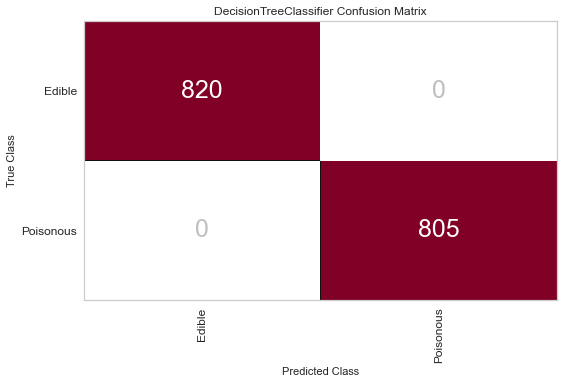

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [105]:
#get model accuracy and create a confusion matrix

#create class labels for confusion matrix
# classes: (p=1 and e=0)
label_encoder = {0: 'Edible', 1: 'Poisonous'}

#initialize the confusion matrix
cm = ConfusionMatrix(clf_model, encoder = label_encoder,  percent=False)

#fit the test set to the confusion matrix
cm.fit(X_test_mush, y_test_mush)

#creates the confusion matrix and gets the accuracy
mod_acc = 100*cm.score(X_test_mush, y_test_mush)
print('Model Accuracy: ', round(mod_acc,2), '%', sep = '')

#change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(25)

#display the confusion matrix
cm.show()

In [106]:
# Double check the above Confusion Matrix using a different library and coding (sklearn metrics and confusion_matrix)
## Print accuracy of model on test data
print("Accuracy: " + str(round(metrics.accuracy_score(y_test_mush, y_pred_mush) * 100)) + '%')

## Print confusion matrix of model on test data
print('\nConfusion Matrix:')
print(pd.DataFrame(metrics.confusion_matrix(y_test_mush, y_pred_mush)).set_axis(['Edible', 'Poisonous'], axis=1).rename({0 : 'Edible', 1 : 'Poisonous'}, axis=0))

Accuracy: 100%

Confusion Matrix:
           Edible  Poisonous
Edible        820          0
Poisonous       0        805


##### 6. Create a visualization of the decision tree

In [109]:
feature_names = list(mush_dummy_df.drop(['Class_Code'], axis=1).columns)
feature_names

['stalk-color-below-ring_b',
 'stalk-color-below-ring_c',
 'stalk-color-below-ring_e',
 'stalk-color-below-ring_g',
 'stalk-color-below-ring_n',
 'stalk-color-below-ring_o',
 'stalk-color-below-ring_p',
 'stalk-color-below-ring_w',
 'stalk-color-below-ring_y',
 'class_e',
 'class_p',
 'cap-surface_f',
 'cap-surface_g',
 'cap-surface_s',
 'cap-surface_y',
 'bruises_f',
 'bruises_t',
 'habitat_d',
 'habitat_g',
 'habitat_l',
 'habitat_m',
 'habitat_p',
 'habitat_u',
 'habitat_w',
 'cap-shape_b',
 'cap-shape_c',
 'cap-shape_f',
 'cap-shape_k',
 'cap-shape_s',
 'cap-shape_x',
 'stalk-surface-below-ring_f',
 'stalk-surface-below-ring_k',
 'stalk-surface-below-ring_s',
 'stalk-surface-below-ring_y',
 'veil-color_n',
 'veil-color_o',
 'veil-color_w',
 'veil-color_y',
 'odor_a',
 'odor_c',
 'odor_f',
 'odor_l',
 'odor_m',
 'odor_n',
 'odor_p',
 'odor_s',
 'odor_y',
 'stalk-color-above-ring_b',
 'stalk-color-above-ring_c',
 'stalk-color-above-ring_e',
 'stalk-color-above-ring_g',
 'stalk-color-

In [119]:
## training the Decision Tree Classifier
clf_model = DecisionTreeClassifier() 

## clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=10, min_samples_leaf=20)   
clf_model.fit(X_train_mush,y_train_mush)

DecisionTreeClassifier()

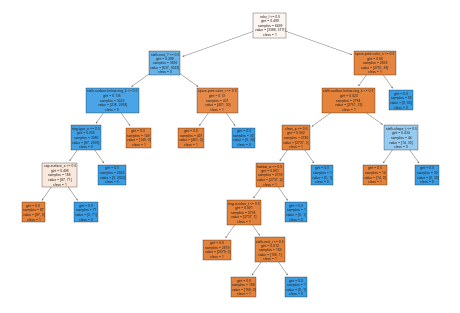

In [120]:
## Plotting decision tree
from sklearn import tree as t

feature_names = list(mush_dummy_df.drop(['Class_Code'], axis=1).columns)
target_names = [str(s) for s in mush_dummy_df.Class_Code]
tree = t.plot_tree(clf_model, filled=True, feature_names=feature_names, class_names=target_names)

##### 7. Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).

In [121]:
## Importing libraries required for this section
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

In [122]:
## Create target and feature_names list
features = X_train_mush
target = y_train_mush

In [125]:
# Convert categorical data by converting data into integers
features = features.astype(int)

In [126]:
# Select 5 features with highest chi-squared statistics
chi2_selector=SelectKBest(chi2, k=5)
features_kbest = chi2_selector.fit_transform(features, target)

In [127]:
# Displaying the results
print ("Original number of features:", features.shape[1])
print ("Reduced number of features:", features_kbest.shape[1])

Original number of features: 117
Reduced number of features: 5


##### 8. Which five features were selected in step 7? Hint: Use the get_support function

In [129]:
# Get columns to keep and create new dataframe with those only
cols = chi2_selector.get_support(indices=True)
features_df_new = features.iloc[:,cols]

In [130]:
## Displaying the result
features_df_new.head()

,stalk-surface-below-ring_k,odor_f,odor_n,stalk-surface-above-ring_k,gill-color_b
0,0,0,1,0,0
1,0,0,1,0,0
2,1,0,0,1,1
3,0,0,0,1,1
4,0,0,1,0,0


In [131]:
## Check shape of new df
features_df_new.shape

(6499, 5)

##### 9. Repeat steps 4 and 5 with the five best features selected in step 7.

In [133]:
## Split the data into a training and test set
X_mush_chi = mush_dummy_df[['odor_f', 'odor_n', 'stalk-surface-below-ring_k', 'gill-color_b', 'stalk-surface-above-ring_k']]

## Creating the target
y_mush_chi = mush_dummy_df['Class_Code']

In [134]:
## split the data into training and test sets (80% Training/20% Test)
X_train_mush_chi, X_test_mush_chi, y_train_mush_chi, y_test_mush_chi = train_test_split(X_mush_chi, y_mush_chi, test_size = 0.2)

In [135]:
## reset indices in the training and test sets to prevent pandas slicing warnings
X_train_mush_chi = X_train_mush_chi.reset_index(drop = True) 
X_test_mush_chi = X_test_mush_chi.reset_index(drop = True)
y_train_mush_chi = y_train_mush_chi.reset_index(drop = True)
y_test_mush_chi = y_test_mush_chi.reset_index(drop = True)

In [136]:
## Training the Decision Tree Classifier
clf_model_5 = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model_5.fit(X_train_mush_chi,y_train_mush_chi)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

C:\Users\KesavAdithya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Model Accuracy: 89.17%


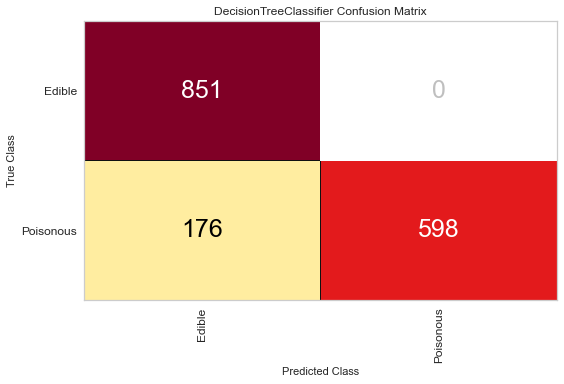

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [137]:
# STEP 5: get model accuracy and create a confusion matrix
#create class labels for confusion matrix
## classes: (p=1 and e=0)
label_encoder = {0: 'Edible', 1: 'Poisonous'}

##initialize the confusion matrix
cm= ConfusionMatrix(clf_model_5, encoder = label_encoder,  percent=False)

## fit the test set to the confusion matrix
cm.fit(X_test_mush_chi, y_test_mush_chi)

## creates the confusion matrix and gets the accuracy
mod_acc_chi = 100*cm.score(X_test_mush_chi, y_test_mush_chi)
print('Model Accuracy: ', round(mod_acc_chi,2), '%', sep = '')

## change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(25)

#display the confusion matrix
cm.show()

##### 10. Summarize your findings.

<b>Findings</b>: With all the features in the first Decision Tree Classifier there was 100% accuracy. After reducing to 5 best features using X2 it went down to 89.71%. However, this revised accuracy is still high with only 5 features instead of 117 - a good piece of information to have when you do Feature Reduction. You can still get a relatively good accuracy percentage with 95% reduction in features.